(12, 25, 60)
(25, 60)


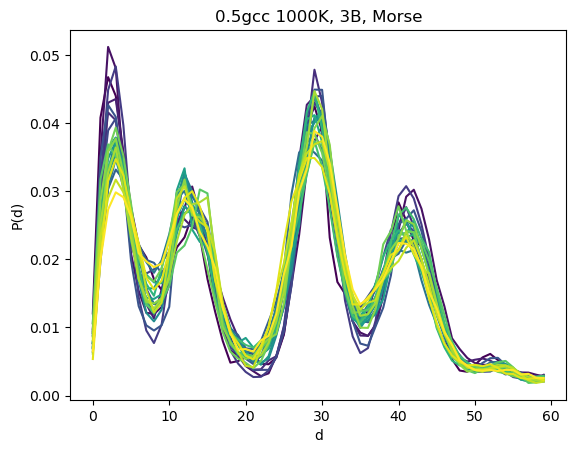

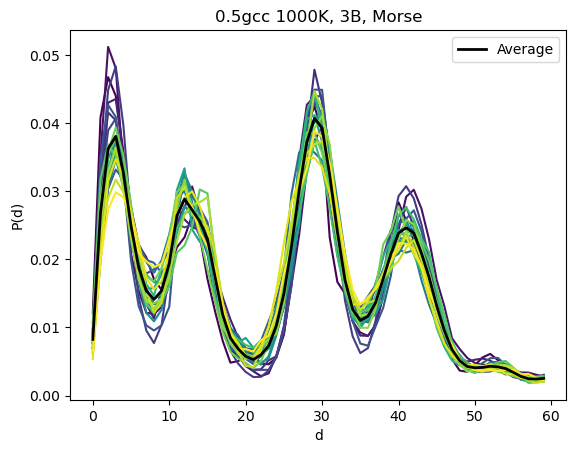

In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open("3b_all_pd", 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

print(np.shape(pd_3b))
print(np.shape(pd_3b[0]))
curves = pd_3b[2][1:] # Skip first frame
# Stack the curves into a single array
stacked_curves = np.stack(curves, axis=0)
# Calculate the mean along the first axis (assuming curves are in rows)
average_curve = np.mean(stacked_curves, axis=0)

# Define a color palette (you can use any color palette you like)
colors = plt.cm.viridis(np.linspace(0, 1, len(curves)))

for index, pd in enumerate(curves):
    plt.plot(pd, color=colors[index])

plt.ylabel("P(d)")
plt.xlabel("d")
plt.title("0.5gcc 1000K, 3B, Morse")
plt.show()

for index, pd in enumerate(curves):
    plt.plot(pd, color=colors[index])

plt.plot(average_curve, color = "k",linewidth=2.0, label="Average")
plt.ylabel("P(d)")
plt.xlabel("d")
plt.title("0.5gcc 1000K, 3B, Morse")
plt.legend()
plt.show()